## VISUALIZACION III  Seaborn

En este ejercicio, de nuevo, trabajaremos con el csv que generamos en el ejercicio de pair programming de Pandas V, ese en el que habíamos unido distintos csv en uno.

En estos ejercicios aprenderemos a hacer algunas gráficas usando la librería seaborn. Igual que el ejercicio anterior de pair programming, para solucionar algunas preguntas tendréis que usar métodos y herramientas aprendidas anteriormente como groupby, value_counts, rename, filtrado de datos, etc.

📌 NOTA Somos analistas y no nos vale con sacar las gráficas. Incluid una celda de markdown donde expliqueis que es lo que estamos viendo en las gráficas, es decir, haced una interpretación de los resultados.

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [2]:
df=pd.read_csv('files/attacks3.csv')

1) Usando la librería seaborn, crea una gráfica de barras que muestre el número de personas que han hecho cada actividad en cada año. Hacedlo solo desde el 2015. Os podrá salir una gráfica un poco fea, no os preocupeis, es lo que esperamos.

In [32]:
df_año = df[(df['year']>=2015)]
df_año.head(2)

,case_number,year,type,country,area,location,activity,name,sex,age,time,species,href,siglo,fatal_(y/n),injury,date
0,2018.06.25,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...,siglo-XXI,N,"No injury to occupant, outrigger canoe and pad...",25-Jun-2018
1,2018.06.03.a,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,Late afternoon,Tiger shark,http://sharkattackfile.net/spreadsheets/pdf_di...,siglo-XXI,Y,FATAL,03-Jun-2018


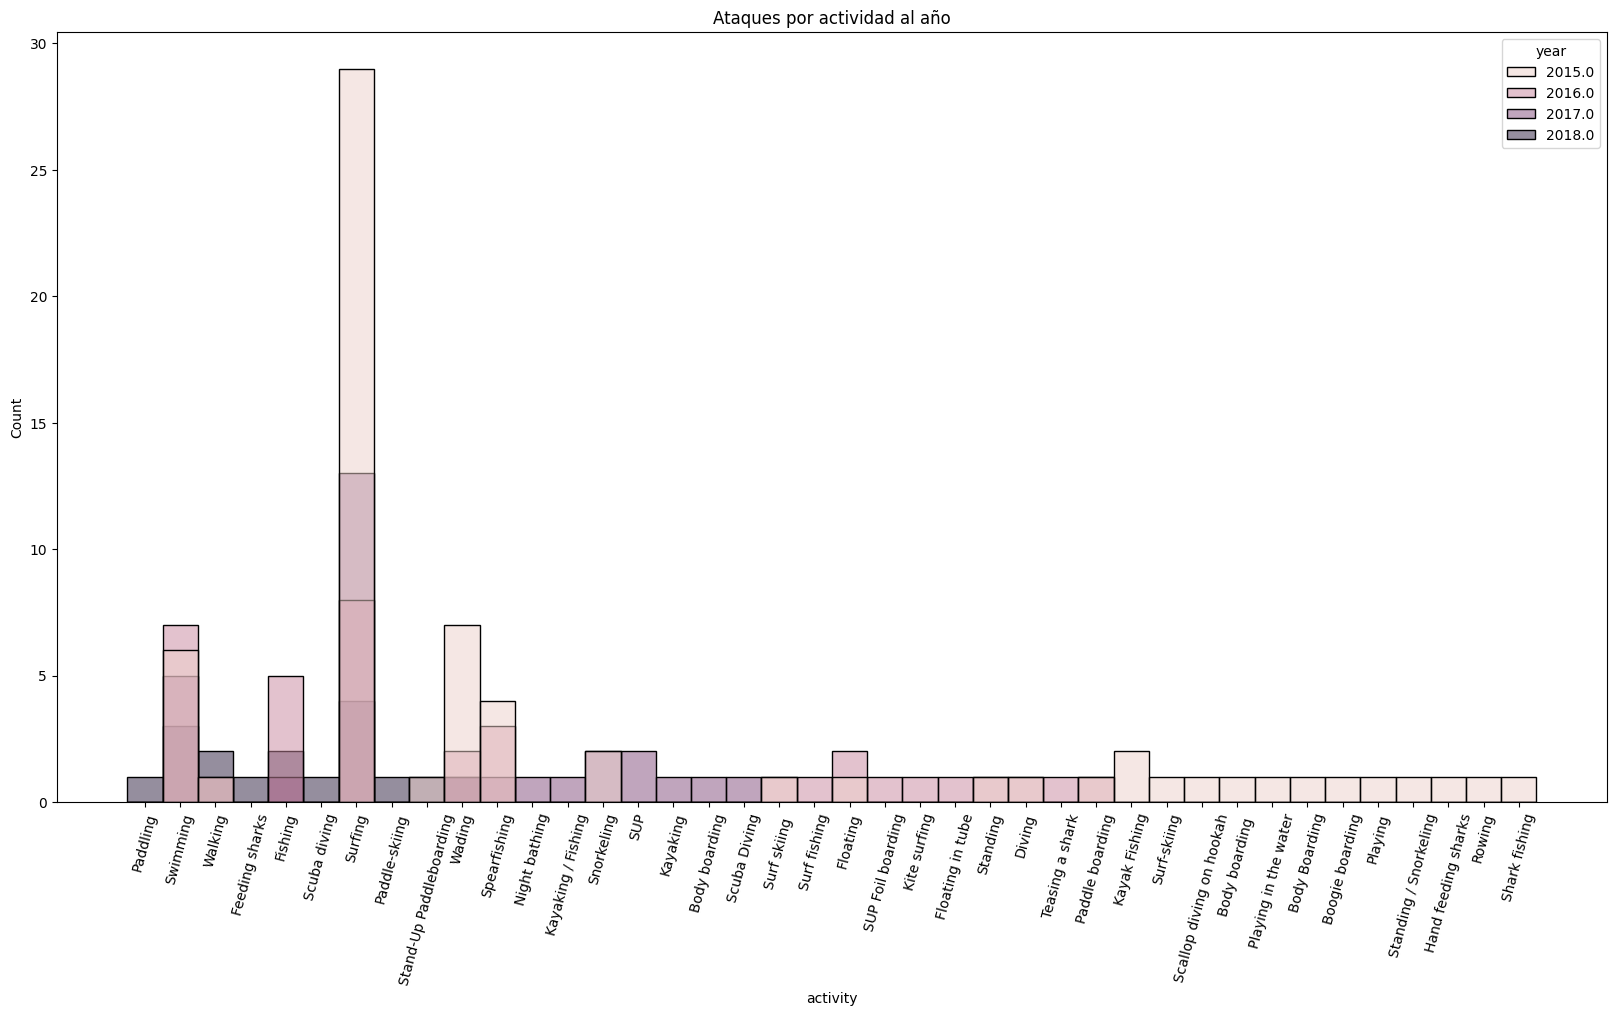

In [38]:
plt.figure(figsize=(20,10))

figure=sns.histplot(x='activity', hue='year', data=df_año, color='skyblue')

figure.set(xlabel='activity', title= 'Ataques por actividad al año')

plt.xticks(rotation= 75)
plt.show()

2) Usando la librería seaborn, crea una gráfica de barras que muestre el número de ataques que han ocurrido cada año en función del sexo. Hacedlo solo desde el 2015.

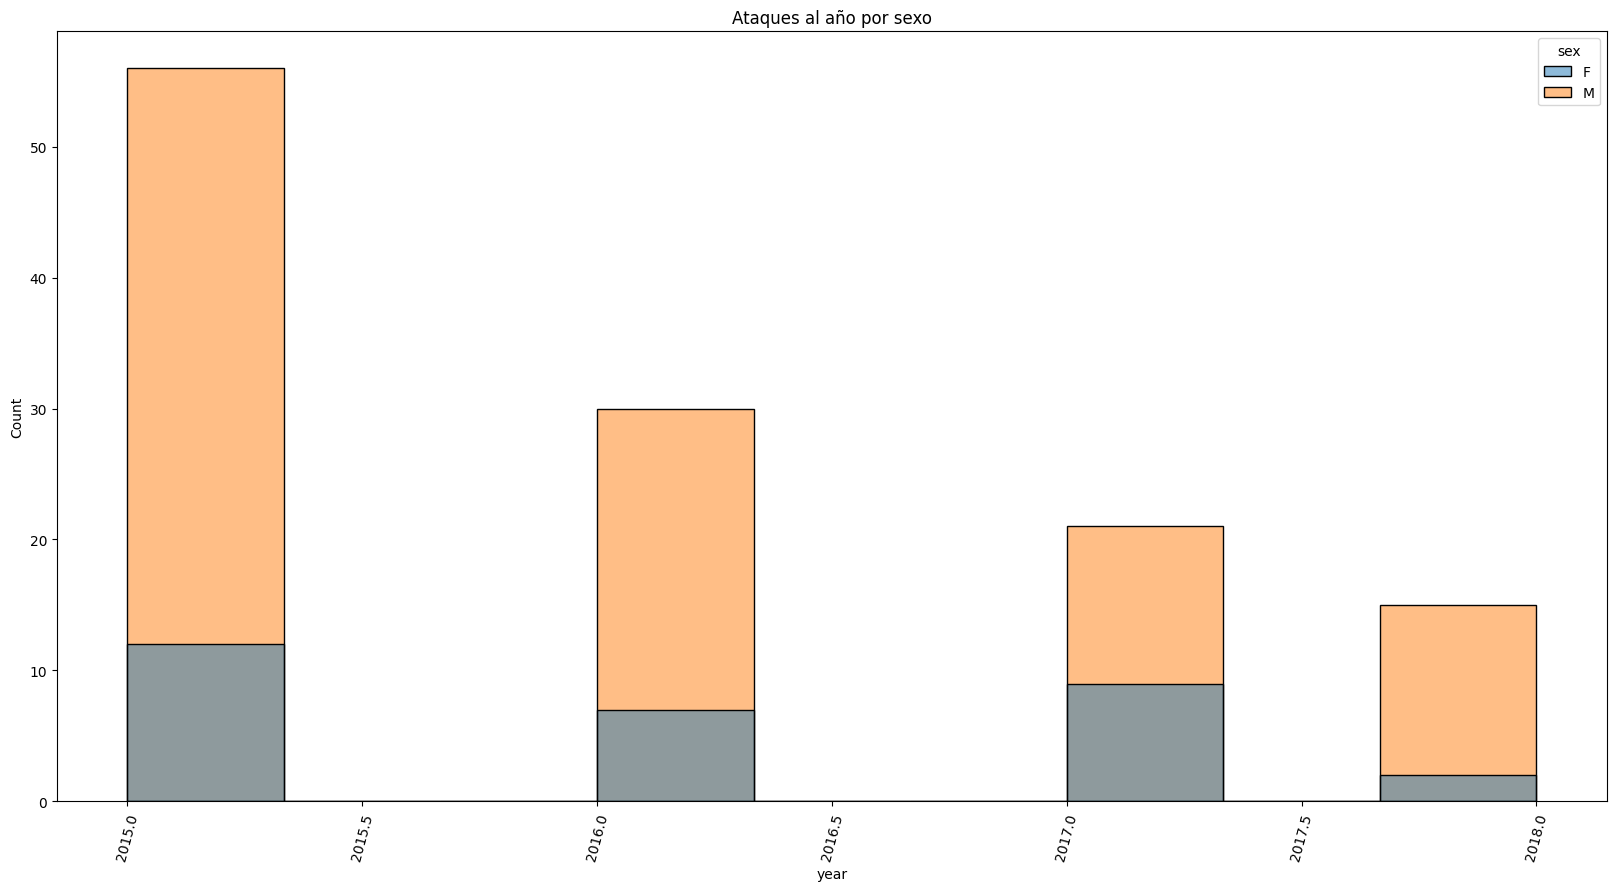

In [39]:
plt.figure(figsize=(20,10))

figure=sns.histplot(x='year',  hue='sex', data=df_año, color='skyblue')

figure.set(xlabel='year', title= 'Ataques al año por sexo')

plt.xticks(rotation= 75)
plt.show()

3) ¿Cuántos ataques hubo por año? Seleccionad solo desde el año 1500.

In [44]:
df_años_1500 = df[(df['year']>=1500)]

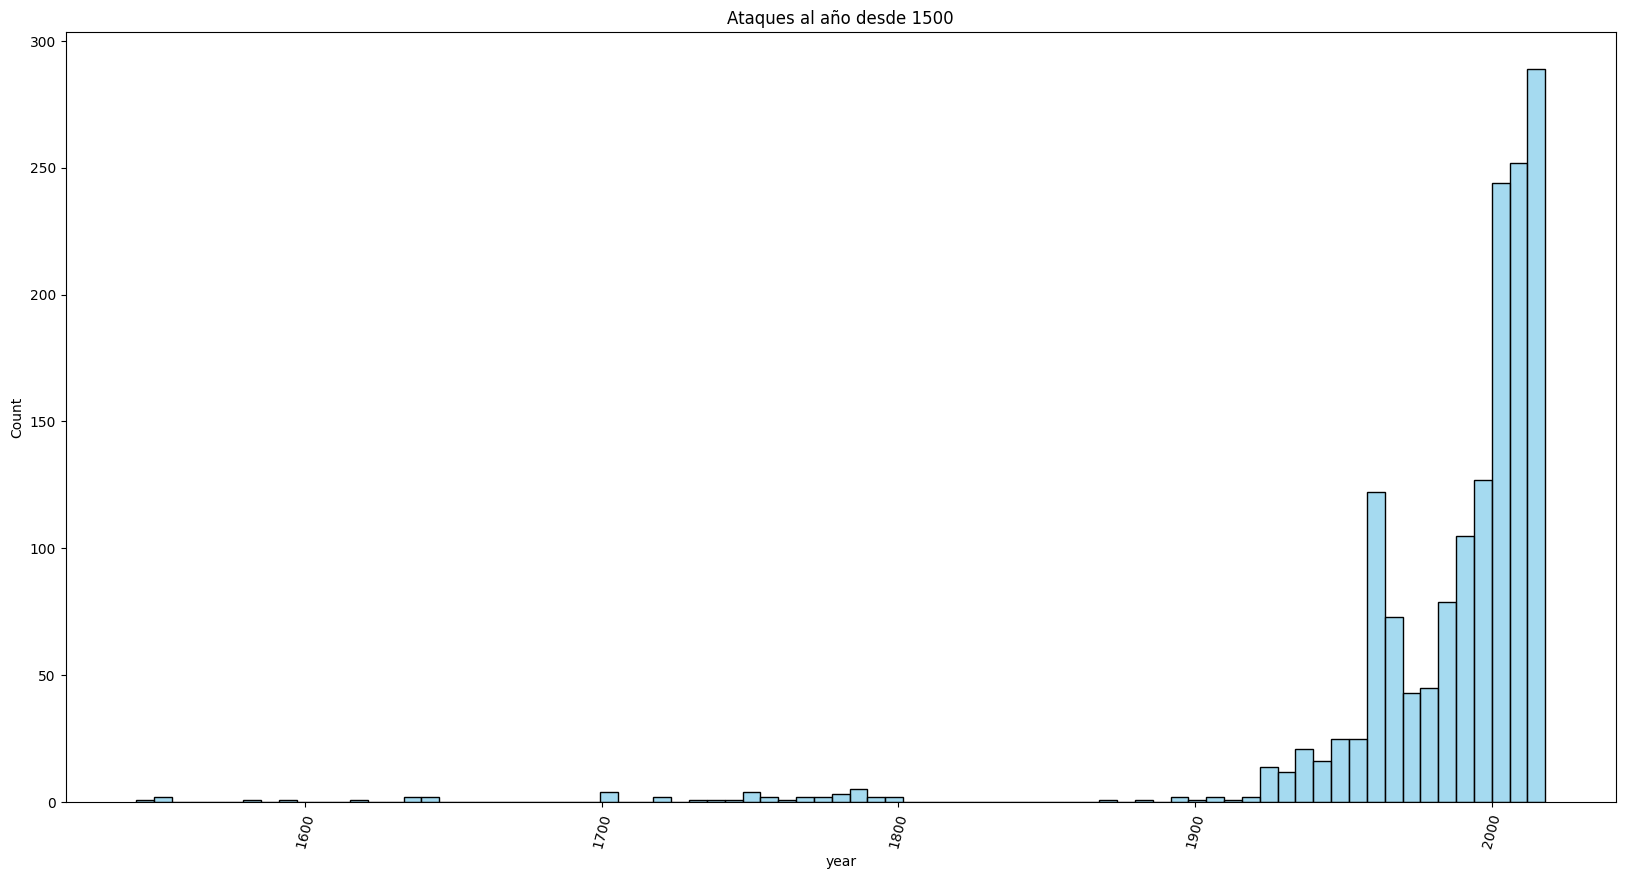

In [46]:
plt.figure(figsize=(20,10))

figure=sns.histplot(x='year', data=df_años_1500, color='skyblue')

figure.set(xlabel='year', title= 'Ataques al año desde 1500')

plt.xticks(rotation= 75)
plt.show()

4) Seleccionad solo los registros de USA, AUSTRALIA y SOUTH AFRICA. Muestra el número de ataques por país y año desde el año 1900.

In [62]:
df_varios=df[(df['country']=='USA')|(df['country']=='AUSTRALIA')|(df['country']=='SOUTH AFRICA')] # Filtramos por paises

df_1900= df_varios[(df_varios['year']>=1900)]# filtramos por los años


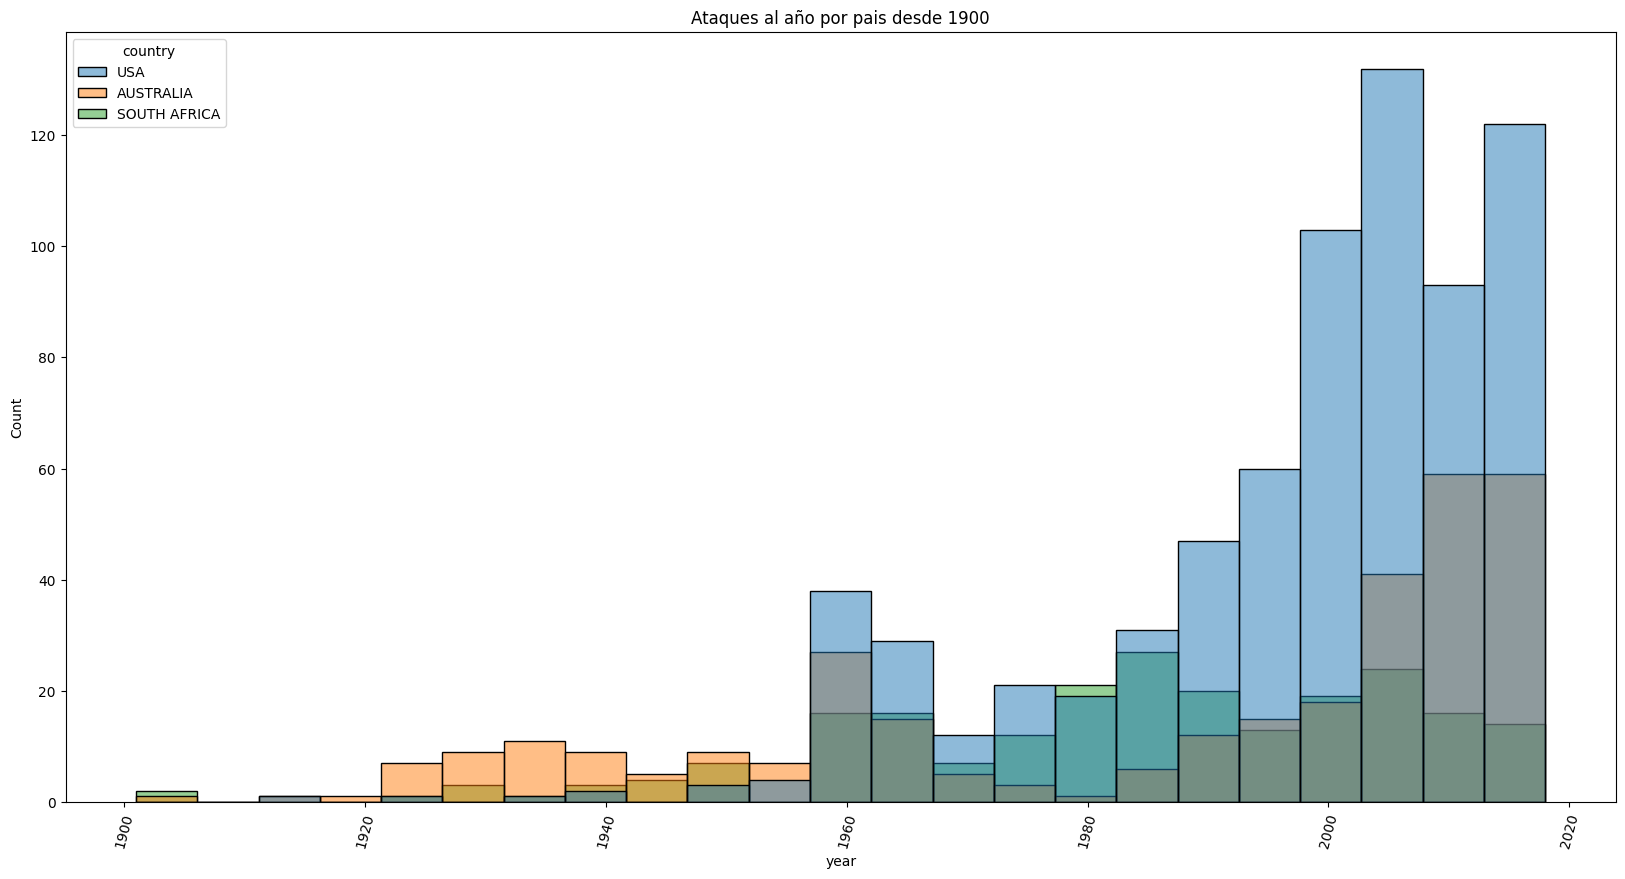

In [63]:
plt.figure(figsize=(20,10))

figure=sns.histplot(x='year', hue= 'country', data=df_1900, color='skyblue')

figure.set(xlabel='year', title= 'Ataques al año por pais desde 1900')

plt.xticks(rotation= 75)
plt.show()

5) Realizad un boxplot donde se muestre los principales estadísticos del número de ataques por país.

In [71]:
df_info = df.describe()
df_info

,year
count,1672.000000
mean,1832.688397
std,528.969901
min,0.000000
25%,1964.000000
50%,1997.000000
75%,2008.000000
max,2018.000000


In [75]:
df_varios.count()

case_number    1318
year           1318
type           1318
country        1318
area           1312
location       1308
activity       1311
name           1318
sex            1317
age            1273
time           1270
species        1282
href           1318
siglo          1269
fatal_(y/n)    1245
injury         1317
date           1318
dtype: int64

In [80]:
df_conteo = df_varios.groupby('country').count()
df_conteo

,case_number,year,type,area,location,activity,name,sex,age,time,species,href,siglo,fatal_(y/n),injury,date
country,,,,,,,,,,,,,,,,
AUSTRALIA,343,343,343,338,335,338,343,342,325,324,330,343,324,326,342,343
SOUTH AFRICA,234,234,234,234,234,234,234,234,226,226,226,234,226,224,234,234
USA,741,741,741,740,739,739,741,741,722,720,726,741,719,695,741,741


In [76]:
+343+234+741

1318

In [73]:
df_conteo.describe()

,case_number,year,type,area,location,activity,name,sex,age,time,species,href,siglo,fatal_(y/n),injury,date
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,439.333333,439.333333,439.333333,437.333333,436.000000,437.000000,439.333333,439.000000,424.333333,423.333333,427.333333,439.333333,423.000000,415.000000,439.000000,439.333333
std,266.875127,266.875127,266.875127,267.225248,267.220882,266.658958,266.875127,267.056174,262.496349,261.551779,263.828227,266.875127,260.984674,247.792252,267.056174,266.875127
min,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,226.000000,226.000000,226.000000,234.000000,226.000000,224.000000,234.000000,234.000000
25%,288.500000,288.500000,288.500000,286.000000,284.500000,286.000000,288.500000,288.000000,275.500000,275.000000,278.000000,288.500000,275.000000,275.000000,288.000000,288.500000
50%,343.000000,343.000000,343.000000,338.000000,335.000000,338.000000,343.000000,342.000000,325.000000,324.000000,330.000000,343.000000,324.000000,326.000000,342.000000,343.000000
75%,542.000000,542.000000,542.000000,539.000000,537.000000,538.500000,542.000000,541.500000,523.500000,522.000000,528.000000,542.000000,521.500000,510.500000,541.500000,542.000000
max,741.000000,741.000000,741.000000,740.000000,739.000000,739.000000,741.000000,741.000000,722.000000,720.000000,726.000000,741.000000,719.000000,695.000000,741.000000,741.000000


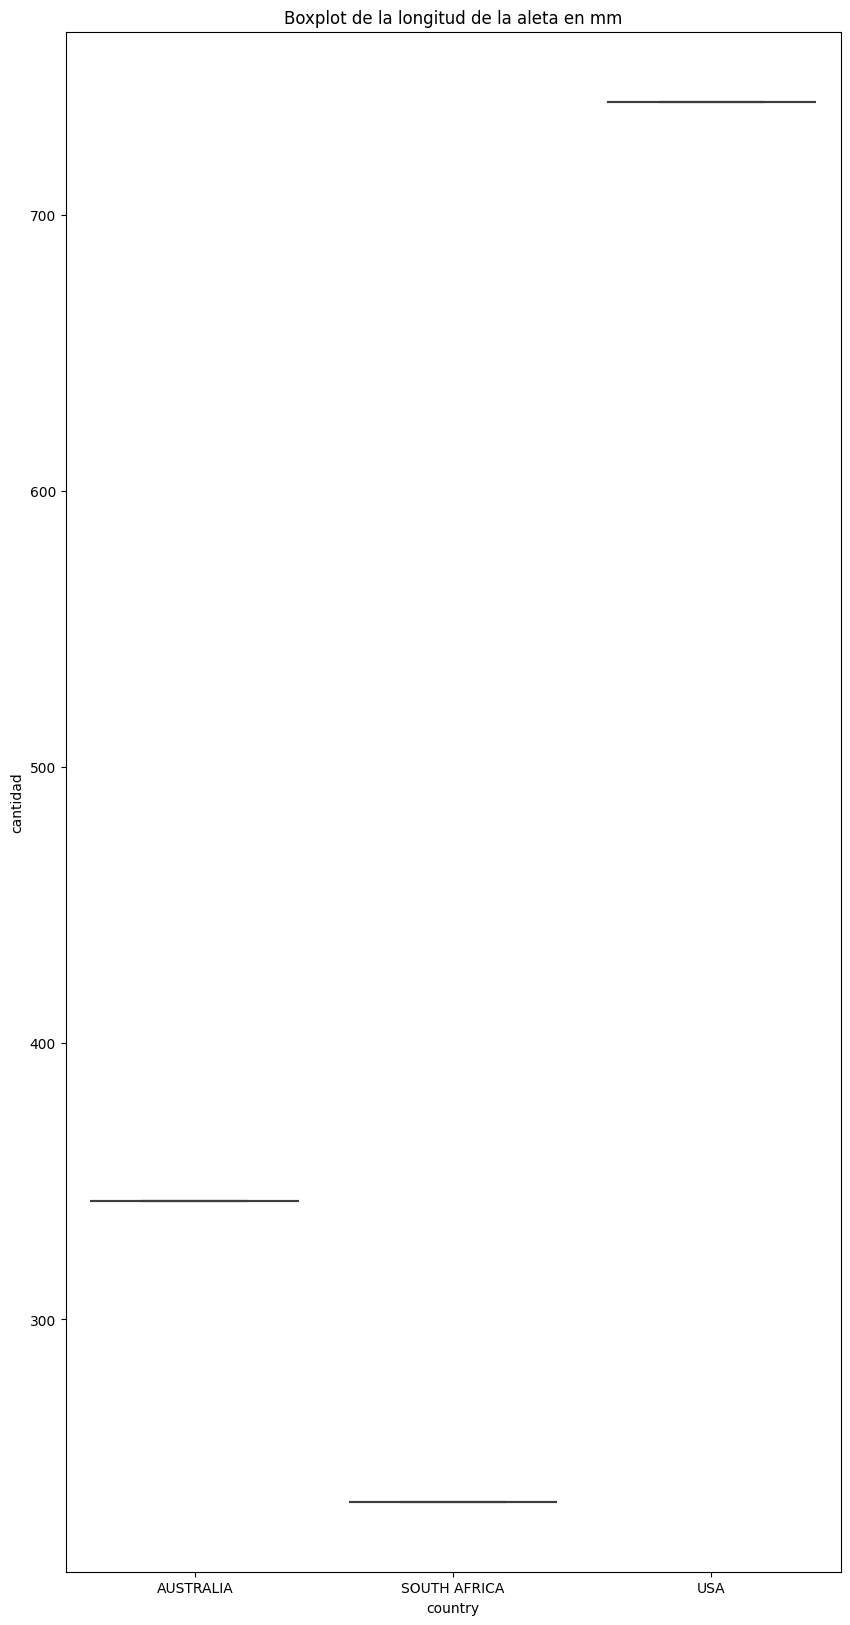

In [83]:

plt.figure(figsize =(10,20))

fig = sns.boxplot(x=df_conteo.index, y= 'year', data = df_conteo)


fig.set(xlabel='country', ylabel= 'cantidad')

# ponemos título a la gráfica
fig.set_title('Boxplot de la longitud de la aleta en mm')

# mostramos la gráfica
plt.show()